In [8]:
import pandas as pd
import seaborn as sns
import ppscore
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
df = sns.load_dataset('tips')

In [3]:
df

,total_bill,tip,sex,smoker,day,time,size
0,16.99,1.01,Female,No,Sun,Dinner,2
1,10.34,1.66,Male,No,Sun,Dinner,3
2,21.01,3.50,Male,No,Sun,Dinner,3
3,23.68,3.31,Male,No,Sun,Dinner,2
4,24.59,3.61,Female,No,Sun,Dinner,4
...,...,...,...,...,...,...,...
239,29.03,5.92,Male,No,Sat,Dinner,3
240,27.18,2.00,Female,Yes,Sat,Dinner,2
241,22.67,2.00,Male,Yes,Sat,Dinner,2
242,17.82,1.75,Male,No,Sat,Dinner,2


In [4]:
pp_df = ppscore.matrix(df)

In [5]:
pp_df

,x,y,ppscore,case,is_valid_score,metric,baseline_score,model_score,model
0,total_bill,total_bill,1.000000,predict_itself,True,None,0.000000,1.000000,None
1,total_bill,tip,0.000000,regression,True,mean absolute error,1.032377,1.059816,DecisionTreeRegressor()
2,total_bill,sex,0.117155,classification,True,weighted F1,0.508197,0.565814,DecisionTreeClassifier()
3,total_bill,smoker,0.000000,classification,True,weighted F1,0.573770,0.510307,DecisionTreeClassifier()
4,total_bill,day,0.000000,classification,True,weighted F1,0.282787,0.276231,DecisionTreeClassifier()
5,total_bill,time,0.000000,classification,True,weighted F1,0.614754,0.605701,DecisionTreeClassifier()
6,total_bill,size,0.000000,regression,True,mean absolute error,0.602459,0.631148,DecisionTreeRegressor()
7,tip,total_bill,0.104377,regression,True,mean absolute error,6.630615,5.938533,DecisionTreeRegressor()
8,tip,tip,1.000000,predict_itself,True,None,0.000000,1.000000,None
9,tip,sex,0.083644,classification,True,weighted F1,0.508197,0.549333,DecisionTreeClassifier()


In [6]:
pp_summary = pd.pivot_table(pp_df, index='x', columns='y', values='ppscore')

In [7]:
pp_summary

y,day,sex,size,smoker,time,tip,total_bill
x,,,,,,,
day,1.000000,0.144677,0.0,0.024364,0.913143,0.000000,0.000000
sex,0.000000,1.000000,0.0,0.000000,0.000000,0.000000,0.000000
size,0.002860,0.038059,1.0,0.000000,0.000000,0.106149,0.134179
smoker,0.055291,0.000000,0.0,1.000000,0.000000,0.000000,0.000000
time,0.267366,0.154691,0.0,0.000000,1.000000,0.000000,0.000000
tip,0.023947,0.083644,0.0,0.000000,0.000000,1.000000,0.104377
total_bill,0.000000,0.117155,0.0,0.000000,0.000000,0.000000,1.000000


<AxesSubplot:xlabel='y', ylabel='x'>

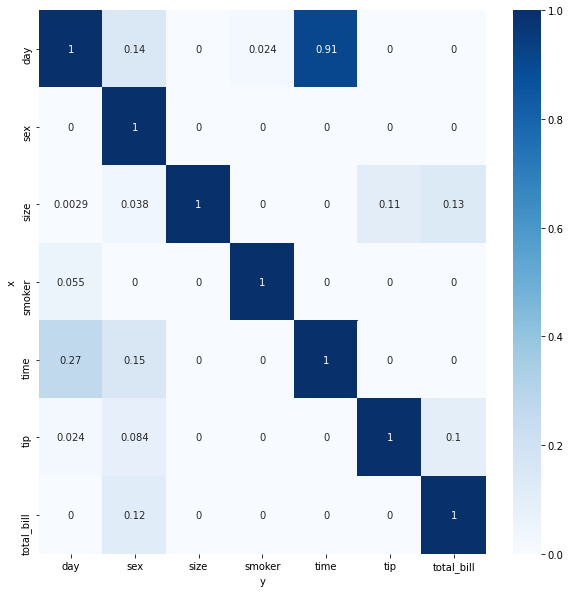

In [9]:
plt.figure(figsize=(10,10))
sns.heatmap(pp_summary, annot=True, cmap='Blues')